In [222]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [223]:
df = pd.read_csv("C:/Users/rahul/Desktop/EDA/project10/amazon.csv", encoding="iso-8859-1",parse_dates=['date'])

In [224]:
df.dtypes

year               int64
state             object
month             object
number           float64
date      datetime64[ns]
dtype: object

# 1. Display Top 5 Rows of The Dataset

In [225]:
df.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


# 2. Check Last 5 Rows

In [226]:
df.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


# 3. Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [227]:
print("Number of Rows: ",df.shape[0])
print("Number of Columns: ",df.shape[1])
print("Shape of our dataset: ",df.shape)

Number of Rows:  6454
Number of Columns:  5
Shape of our dataset:  (6454, 5)


# 4. Getting Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


# 5. Check For Duplicate Data and Drop Them

In [229]:
print("Are there any duplicated values in the data:",df.duplicated().any())

Are there any duplicated values in the data: True


In [230]:
df = df.drop_duplicates()

In [231]:
df.shape

(6422, 5)

In [232]:
print("Are there any duplicated values in the data:",df.duplicated().any())

Are there any duplicated values in the data: False


In [233]:
print("Number of Duplicated Values: ")
6454 - 6422

Number of Duplicated Values: 


32

# 6. Check Null Values In The Dataset

In [234]:
df.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

# 7. Get Overall Statistics About The Dataframe

In [235]:
df.describe(include = 'all')

,year,state,month,number,date
count,6422.000000,6422,6422,6422.000000,6422
unique,NaN,23,12,NaN,NaN
top,NaN,Rio,Agosto,NaN,NaN
freq,NaN,697,540,NaN,NaN
mean,2007.490969,NaN,NaN,108.815178,2007-06-29 10:46:40.622859008
min,1998.000000,NaN,NaN,0.000000,1998-01-01 00:00:00
25%,2003.000000,NaN,NaN,3.000000,2003-01-01 00:00:00
50%,2007.000000,NaN,NaN,24.497000,2007-01-01 00:00:00
75%,2012.000000,NaN,NaN,114.000000,2012-01-01 00:00:00
max,2017.000000,NaN,NaN,998.000000,2017-01-01 00:00:00


# 8. Rename Month Names To English

In [236]:
df['month'].unique()

array(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
      dtype=object)

In [237]:
df['month'] = df['month'].map({'Janeiro':'Jan',
                               'Fevereiro':'Feb',
                               'Março':'Mar',
                               'Abril':'Apr',
                               'Maio':'May',
                               'Junho':'Jun',
                               'Julho':'Jul',
                               'Agosto':'Aug',
                               'Setembro':'Sep',
                               'Outubro':'Oct',
                               'Novembro':'Nov',
                               'Dezembro':'Dec'})

In [238]:
df['month'].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

# 9. Total Number of Fires Registered

In [239]:
df.shape

(6422, 5)

In [240]:
print("Number of Fires Registered: ",df.shape[0])

Number of Fires Registered:  6422


# 10. In Which Month Maximum Number of Forest Fires Were Reported?

In [241]:
df.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [242]:
df1 = df.groupby('month')['number'].sum().reset_index()
df1

,month,number
0,Apr,28184.770
1,Aug,88050.435
2,Dec,57535.480
3,Feb,30839.050
4,Jan,47681.844
5,Jul,92319.113
6,Jun,55997.675
7,Mar,30709.405
8,May,34725.363
9,Nov,85508.054


<Axes: xlabel='month', ylabel='number'>

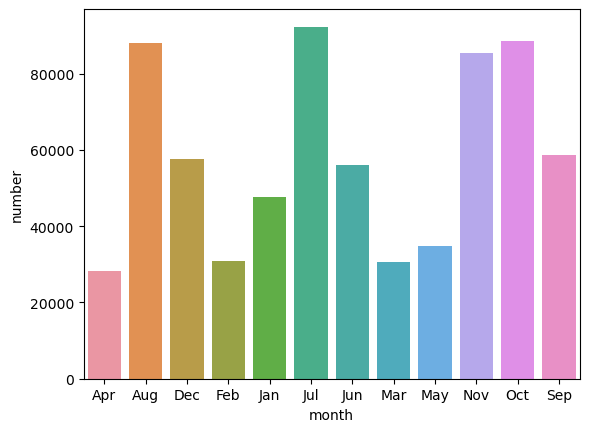

In [243]:
sns.barplot(x ="month",y ="number",data=df1)

# 11. In Which Year Maximum Number of Forest Fires Was Reported?

In [244]:
df2 = df.groupby('year')['number'].sum().reset_index()
df2

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29054.612
4,2002,37390.600
5,2003,42760.674
6,2004,38450.163
7,2005,35004.965
8,2006,33824.161
9,2007,33028.413


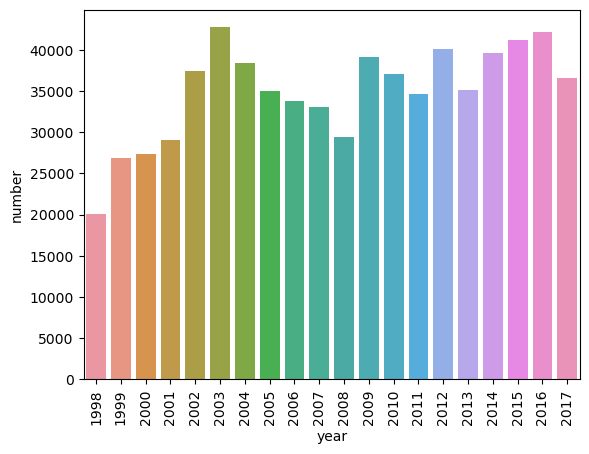

In [245]:
sns.barplot(x ="year",y ="number",data=df2)
plt.xticks(rotation=90)
plt.show()

# 12. In Which State Maximum Number of Forest Fires Was Reported?

In [246]:
df.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [247]:
df3= df.groupby('state')['number'].sum().reset_index()
df3

,state,number
0,Acre,18464.030
1,Alagoas,4606.000
2,Amapa,21831.576
3,Amazonas,30650.129
4,Bahia,44746.226
5,Ceara,30428.063
6,Distrito Federal,3561.000
7,Espirito Santo,6546.000
8,Goias,37695.520
9,Maranhao,25129.131


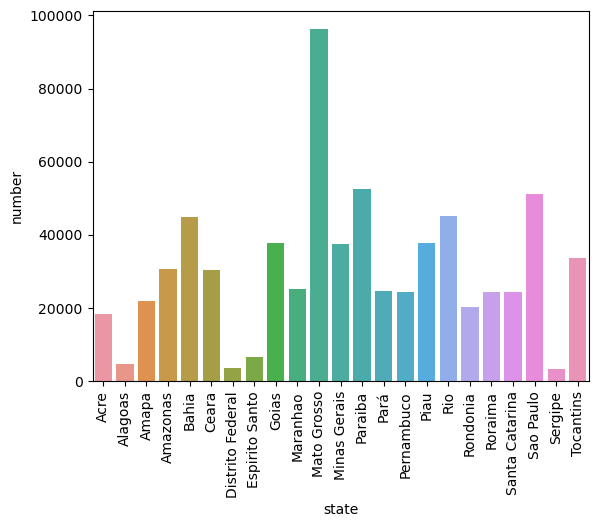

In [248]:
sns.barplot(x ="state",y ="number",data=df3)
plt.xticks(rotation=90)
plt.show()

# 13. Find Total Number of Fires Were Reported In Amazonas

In [249]:
df[df['state']=="Amazonas"]['number'].sum()

30650.129

# 14. Display Number of Fires Were Reported In Amazonas (Year-Wise)

In [250]:
df.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [251]:
df4 = df[df['state'] == "Amazonas"]
df4

,year,state,month,number,date
718,1998,Amazonas,Jan,0.0,1998-01-01
719,1999,Amazonas,Jan,3.0,1999-01-01
720,2000,Amazonas,Jan,7.0,2000-01-01
721,2001,Amazonas,Jan,3.0,2001-01-01
722,2002,Amazonas,Jan,17.0,2002-01-01
...,...,...,...,...,...
952,2012,Amazonas,Dec,80.0,2012-01-01
953,2013,Amazonas,Dec,236.0,2013-01-01
954,2014,Amazonas,Dec,293.0,2014-01-01
955,2015,Amazonas,Dec,565.0,2015-01-01


In [252]:
df5 = df4.groupby('year')['number'].sum().reset_index()
df5

,year,number
0,1998,946.000
1,1999,1061.000
2,2000,853.000
3,2001,1297.000
4,2002,2852.000
5,2003,1524.268
6,2004,2298.207
7,2005,1657.128
8,2006,997.640
9,2007,589.601


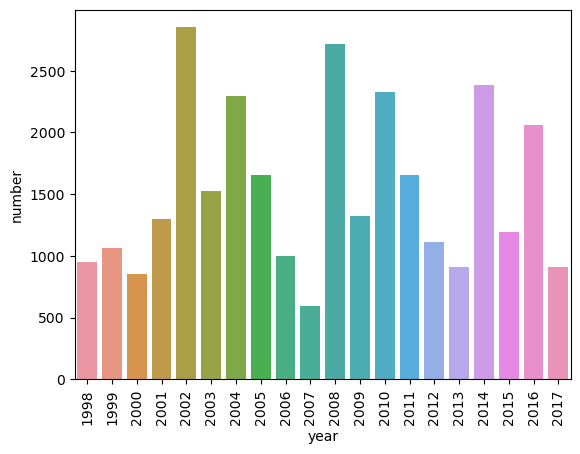

In [253]:
sns.barplot(x="year",y = "number",data= df5)
plt.xticks(rotation = 90)
plt.show()

# 15. Find Total Number of Fires  Were Reported In 2015 And Visualize Data Based on Each ‘Month’

In [254]:
df.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [255]:
df7 =df[df['year']==2015].groupby('month')['number'].sum().reset_index()
df7

,month,number
0,Apr,2573.000
1,Aug,4363.125
2,Dec,4088.522
3,Feb,2309.000
4,Jan,4635.000
5,Jul,4364.392
6,Jun,3260.552
7,Mar,2202.000
8,May,2384.000
9,Nov,4034.518


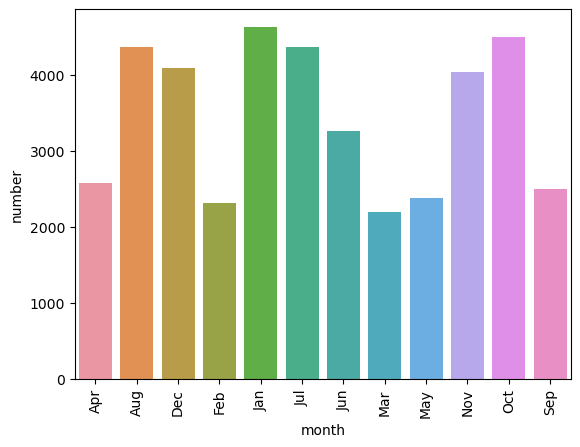

In [256]:
sns.barplot(x = "month",y ="number",data = df7)
plt.xticks(rotation = 90)
plt.show()

# 17. Find Average Number of Fires Were Reported From Highest to Lowest (State-Wise

In [257]:
df.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [258]:
df8 =df.groupby('state')['number'].mean().sort_values(ascending =False).reset_index()
df8

,state,number
0,Sao Paulo,213.896226
1,Mato Grosso,203.479975
2,Bahia,187.222703
3,Piau,158.174674
4,Goias,157.721841
5,Minas Gerais,156.800243
6,Tocantins,141.037176
7,Amazonas,128.243218
8,Ceara,127.314071
9,Paraiba,111.073979


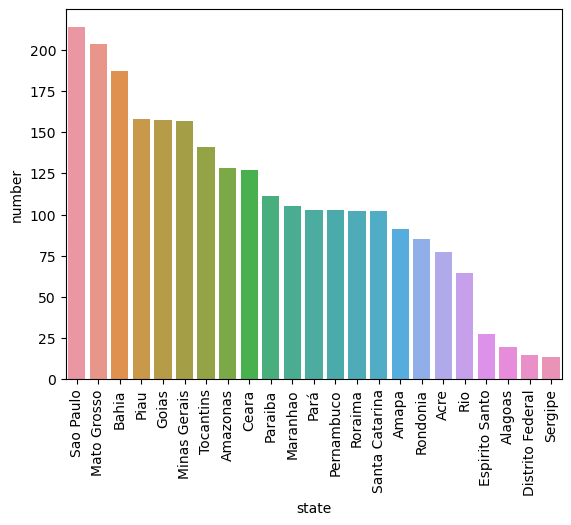

In [259]:
sns.barplot(x = "state",y ="number",data = df8)
plt.xticks(rotation = 90)
plt.show()

# 18.  To Find The State Names Where Fires Were Reported In 'dec' Month

In [260]:
df.columns


Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [261]:
df[df['month'] == "Dec"]['state'].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)